# Comparativa de modelos predictivos para identificación de sentimientos

El análisis de sentimientos es una técnica que permite detectar el sentimiento subyacente de un fragmento de texto. Los sentimientos se suelen clasificar como: neutros, positivos y negativos. Existen diferentes maneras de analizar el texto para poder identificar el proposito o sentimiento del texto.

## ¿Por qué es importante el análisis de texto?

El análisis de sentimientos es esencial para múltiples tareas empresariales y retos del nuevo siglo. Mediante éste, ha sido posible mejorar en gran medida la atención al cliente y la automatización de procesos donde el lenguaje humano es altamente utilizado. Estos son algunos de los sectores donde es más usado el análisis de sentimientos:

- Sector comercial.
- Sector bancario.
- Sector social.
- Sector logistico.
- Sector de transporte.

Las aplicaciones del análisis de sentimientos son amplias y poderosas. La capacidad de extraer conocimientos de los datos sociales es una práctica que está siendo adoptada ampliamente por organizaciones de todo el mundo. El lenguaje humano es complejo. Enseñar a una máquina a analizar los diversos matices gramaticales, variaciones culturales, jergas y errores ortográficos que se producen en las menciones online es un proceso difícil. Enseñar a una máquina a comprender cómo el contexto puede afectar el tono es aún más difícil.

# Configuración de ambiente

El conjunto de datos elegido para este proyecto esta conformado por un conjunto de tweets, el sentimiento que expresa y aquellas palabras que soportan el sentimiento.

Los tweets fueron obtenidos de la plataforma "Data for Everyone" de Figure Eight. El conjunto de datos se titula Análisis de sentimiento: tweets de emoción en texto con etiquetas de sentimiento existentes. El conjunto de datos se encuentra licenciado como creative commons 4.0, licencia internacional. 

## ¿Qué archivos conforman el conjunto de datos?

- **train.csv:** Conjunto de datos de entrenamiento
- **test.csv:** Conjunto de datos de prueba

## Columnas del conjunto de datos

- textID: Identificador único por tweet
- text: Texto del tweet
- sentiment: Sentimiento del tweet
- selected_text: [Solo entrenamiento] Texto que soporta el sentimiento

Cada fila contiene el texto de un tweet y una etiqueta de opinión. En el conjunto de entrenamiento, se le proporciona una palabra o frase extraída del tweet (selected_text) que encapsula el sentimiento proporcionado.



Para comenzar con el proceso de análisis de datos, primero importamos las librerías que necesitaremos en todo el proceso.

In [1]:
!pip install --upgrade plotly==4.0.0

     |████████████████████████████████| 6.8 MB 4.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.11.0
    Uninstalling plotly-4.11.0:
      Successfully uninstalled plotly-4.11.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

plotly-express 0.4.1 requires plotly>=4.1.0, but you'll have plotly 4.0.0 which is incompatible.
cufflinks 0.17.3 requires plotly>=4.1.1, but you'll have plotly 4.0.0 which is incompatible.
catalyst 20.10.1 requires plotly>=4.1.0, but you'll have plotly 4.0.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.preprocessing import LabelEncoder

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Activation,Flatten,Embedding,GlobalAveragePooling1D,Dropout,LSTM,Conv1D
from tensorflow.keras.models import Model

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
import missingno as msno
from collections import defaultdict
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



Cargamos los datos de entrada proporcionados por tweet-sentiment-extraction

In [4]:
train = pd.read_csv("/kaggle/input/tweet-sentiment-extraction/train.csv")
test = pd.read_csv("/kaggle/input/tweet-sentiment-extraction/test.csv")
target = train['sentiment']

In [5]:
train.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


Con los datos cargados, procedemos a realizar una analisis inicial de los datos para tratar de identificar posibles problemas o dificultades.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


Podemos identificar que existen algunos datos nulos, procedemos a eliminarlos

In [7]:
train.dropna(inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


# Análisis exploratorio

Con los datos listos podemos proceder al analisis exploratorio de los datos

In [9]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,040e7230e2,Sorry we couldn`t get the project working wit...,good,neutral
freq,1,1,199,11117


In [10]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


Text(0, 0.5, 'Cantidad')

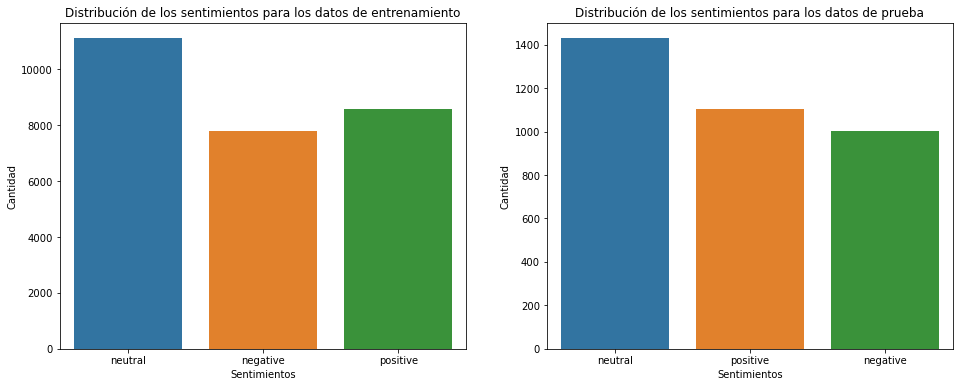

In [11]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
sns.countplot(x='sentiment',data=train)
plt.title('Distribución de los sentimientos para los datos de entrenamiento')
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad')

ax = fig.add_subplot(1,2,2)
sns.countplot(x='sentiment',data=test)
plt.title('Distribución de los sentimientos para los datos de prueba')
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad')

In [12]:
fig = go.Figure(go.Funnelarea(text =temp.sentiment, values = temp.text))
fig.show()

Procedemos a hallar el indice de jaccard entre el texto del tweet y el texto seleccionado. También obtenemos algunas variables relevantes como: número de palabras en el texto, número de palabras en el texto seleccionado y diferencia de palabras.

In [13]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [14]:
temp = train.copy()

results_jaccard=[]
for ind,row in temp.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append(jaccard_score)

In [15]:
temp['jaccard_score'] = results_jaccard

In [16]:
temp.head()

,textID,text,selected_text,sentiment,jaccard_score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286


In [17]:
temp['count_st'] = train['selected_text'].apply(lambda x:len(str(x).split())) 
temp['count_t'] = train['text'].apply(lambda x:len(str(x).split())) 
temp['difference_in_words'] = temp['count_t'] - temp['count_st']

In [18]:
temp.head()

,textID,text,selected_text,sentiment,jaccard_score,count_st,count_t,difference_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,3,14,11


Contamos la cantidad de palabras que existe en el texto completo y el texto seleccionado para tener una idea de la distribución que siguen los datos de entrada. Esta apróximación nos da una idea de posibles soluciones a plantear.

En los siguientes graficos nos podemos dar una idea del tamaño del texto seleccionado (en caracteres) según el sentimiento. 

**Anotaciones**

- La distribución para los tweets negativos y positivos es casi la misma.
- El texto seleccionado en los tweets neutrales es considerablemente más grande, que en los demás casos.

In [19]:
rug_text_one = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
                'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
                'u', 'v', 'w', 'x', 'y', 'z']

rug_text_two = ['aa', 'bb', 'cc', 'dd', 'ee', 'ff', 'gg', 'hh', 'ii', 'jj',
                'kk', 'll', 'mm', 'nn', 'oo', 'pp', 'qq', 'rr', 'ss', 'tt',
                'uu', 'vv', 'ww', 'xx', 'yy', 'zz']
group_labels = ['Selected_Text', 'Text']
rug_text = [rug_text_one, rug_text_two] # for hover in rug plot
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

# Create distplot with custom bin_size
fig = ff.create_distplot([temp['count_st'], temp['count_t']], group_labels,show_curve=False, rug_text=rug_text, colors=colors)
fig.update_layout(title_text='Distribución de número de palabras')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [20]:
vals=[]
sent = ['positive', 'negative', 'neutral']
for i in range(0,3):
    x=temp[temp['sentiment']==sent[i]]['selected_text'].dropna().str.len()
    vals.append(x)

fig = ff.create_distplot(vals, sent)
fig.update_layout(title="Distribución del número de caracteres en la variable Selected text")
fig.show()

En los siguientes graficos podemos identificar que la distribución del número de palabras sigue un comportamiento similar a la distribución del número de caracteres.

El texto seleccionado en los tweets negativos y positivos presenta un claro sesgo hacia la izquierda, mientras para los tweets neutrales la distribución se mantiene muy similar al texto completo.

Text(0.5, 0.98, 'Ditribución de número de palabras por tweets')

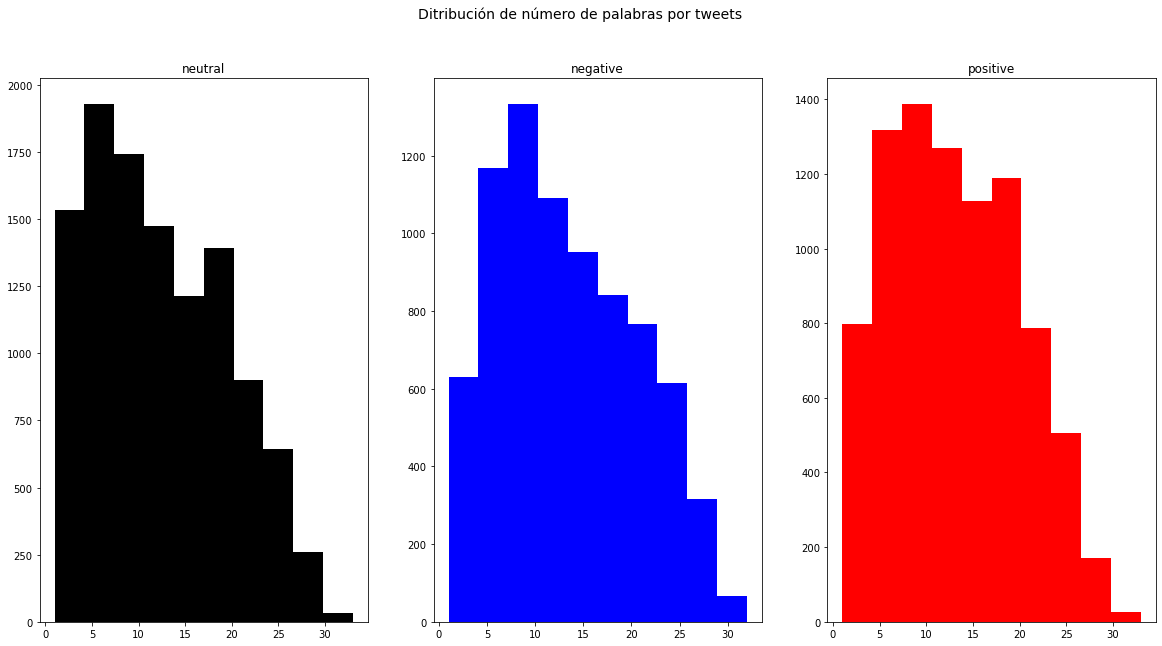

In [21]:
sent=temp.sentiment.unique()
colors = ['k', 'b', 'r']
fig = plt.figure(figsize=(20,10))
for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    plt.hist(temp[temp['sentiment']==sent[i]]['count_t'], color=colors[i])
    plt.title(sent[i])
fig.suptitle("Ditribución de número de palabras por tweets", fontsize=14)

Text(0.5, 0.98, 'Ditribución de número de palabras por tweets')

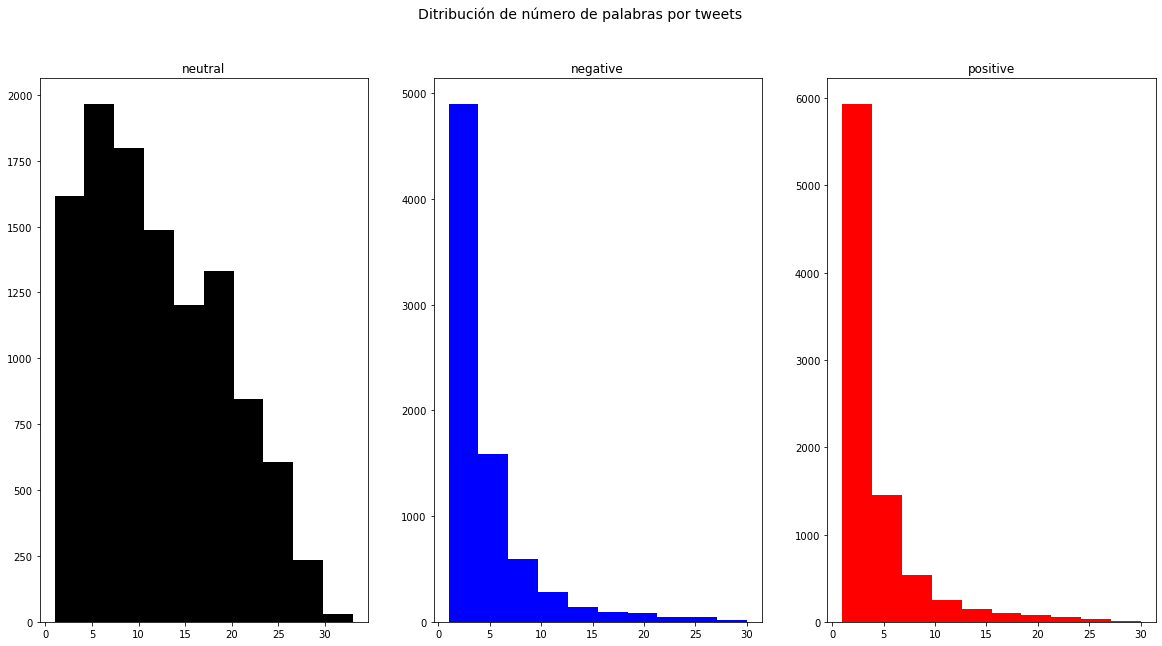

In [22]:
sent=temp.sentiment.unique()
colors = ['k', 'b', 'r']
fig = plt.figure(figsize=(20,10))
for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    plt.hist(temp[temp['sentiment']==sent[i]]['count_st'], color=colors[i])
    plt.title(sent[i])
fig.suptitle("Ditribución de número de palabras por tweets", fontsize=14)

**Las siguientes graficas nos permiten visualizar que el indice de Jaccard para los tweets neutrales en su mayoría es 1, es decir, la cantidad de palabras del texto seleccionado es la misma cantidad de palabras en el texto completo del tweet.**

En los sentimientos positivos y negativos, la distribución kernel del indice de Jaccard muestra dos nucleos principales de concentración de la palabras. El nucleo cercano a 1, nos da indicios que los tweets con muy pocas palabras siempre tienen el mismo número de palabras seleccionadas. Lo cual resulta bastante útil para la clasificación.

Es interesante análizar la aproximación kernel del indice de Jaccard y de la diferencia de palabras. Pues, junto con los datos obtenidos anteriormente de la distribución de palabras seleccionadas y la distribución de palabras totales, nos pueden dar una idea del comportamiento del indice de Jaccard esperado (metrica de validación) según el sentimiento.


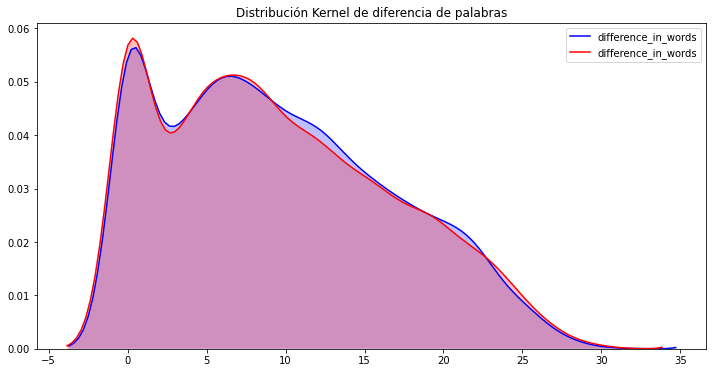

In [23]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(temp[temp['sentiment']=='positive']['difference_in_words'], shade=True, color="b").set_title('Distribución Kernel de diferencia de palabras')
p2=sns.kdeplot(temp[temp['sentiment']=='negative']['difference_in_words'], shade=True, color="r")

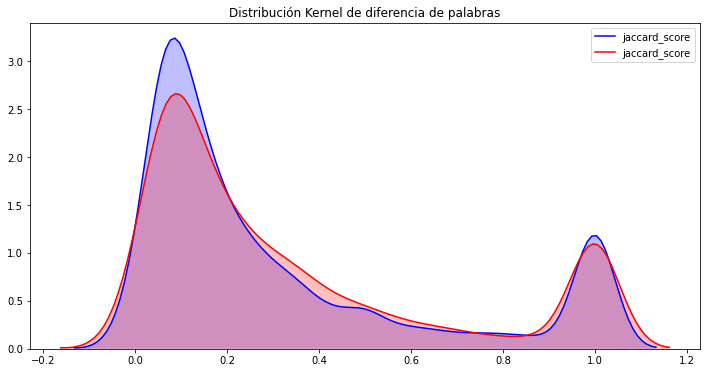

In [24]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(temp[temp['sentiment']=='positive']['jaccard_score'], shade=True, color="b").set_title('Distribución Kernel de diferencia de palabras')
p2=sns.kdeplot(temp[temp['sentiment']=='negative']['jaccard_score'], shade=True, color="r")

# Análisis de palabras

Para continuar con el análisis de palabras es necesario limpiar los tweets de:

- Signos de puntuación.
- Mayúsculas (Todo el texto se procesará en minúscula).
- Información entre parentesis y brakets.
- Números.
- Palabras vácias

In [25]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [26]:
train_clean = train.copy()

train_clean['text'] = train['text'].apply(lambda x:clean_text(x))
train_clean['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [27]:
train_clean.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative


In [28]:
train_clean['temp_list'] = train_clean['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_clean['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['palabra_comun','count']
temp.style.background_gradient(cmap='Blues')

,palabra_comun,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


In [29]:
fig = px.bar(temp, x="count", y="palabra_comun", title='Las palabras más comunes en el texto seleccionado', orientation='h', 
             width=700, height=700,color='palabra_comun')
fig.show()

Dado que hay muchas palabaras vácias (Palabras sin significado de manera individual). Se debe proceder a limpiar el texto seleccionado para identificar las palabaras que mas se repiten.

In [30]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train_clean['temp_list'] = train_clean['temp_list'].apply(lambda x:remove_stopword(x))

In [31]:
top = Counter([item for sublist in train_clean['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,good,1251
2,day,1058
3,love,909
4,happy,852
5,like,774
6,get,772
7,dont,765
8,go,700
9,cant,613
10,work,612


In [32]:
fig = px.bar(temp, x="count", y="Common_words", title='Las palabras más comunes en el texto seleccionado SIN stopwords', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [33]:
train_clean['temp_list1'] = train_clean['text'].apply(lambda x:str(x).split())
train_clean['temp_list1'] = train_clean['temp_list1'].apply(lambda x:remove_stopword(x)) 

In [34]:
top = Counter([item for sublist in train_clean['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['palabra_comun','count']
temp.style.background_gradient(cmap='Blues')

,palabra_comun,count
1,day,2044
2,good,1549
3,get,1426
4,like,1346
5,go,1267
6,dont,1200
7,love,1122
8,work,1112
9,going,1096
10,today,1096


In [35]:
fig = px.bar(temp, x="count", y="palabra_comun", title='Palabras cómunes en los tweets', orientation='h', 
             width=700, height=700,color='palabra_comun')
fig.show()

## División por sentimientos.

In [36]:
Positive_sent = train_clean[train_clean['sentiment']=='positive']
Negative_sent = train_clean[train_clean['sentiment']=='negative']
Neutral_sent = train_clean[train_clean['sentiment']=='neutral']

In [37]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['palabra_comun','count']
temp_positive.style.background_gradient(cmap='Greens')

,palabra_comun,count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


In [38]:
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,miss,358
2,sad,343
3,sorry,300
4,bad,246
5,hate,230
6,dont,221
7,cant,201
8,sick,166
9,like,162
10,sucks,159


In [39]:
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Greys')

,Common_words,count
1,get,612
2,go,569
3,day,492
4,dont,482
5,going,472
6,work,467
7,like,445
8,got,441
9,today,427
10,lol,427


Es interesante resaltar que algunas palabras se repiten en las tres divisiones (get,go,dont,got,u,cant,lol,like). Esto a simple vista puede parecer un error de clasificación, sin embargo, solo es una muestra de lo nutrido que se encuentra nuestro conjunto de datos.

# Conclusiones EDA y Análisis de palabras

- Es posible visualizar que las palabras seleccionadas para sustentar el sentimiento, siempre se encuentran dentro del texto principal.

- Las palabras seleccionadas siempre son menores o iguales en cantidad a las palabras que contiene el texto principal del tweet.

- En las palabras seleccionadas con sentimiento neutro existe una tendencia clara a que la cantidad de palabras seleccionadas tengan un tamaño igual al tamaño del texto principal.

- La distribución de la cantidad de palabras de los tweet con sentimiento positivo y negativo son más complicadas de identificar y están distribuidas en dos secciones principalmente. Aquellas que contiene todas las palabras y aquellas que contiene aproximadamente una cuarta parte de las palabras del texto principal.

- Las aproximaciones más comunes para este tipo de problemas son las Question And Answers (QA).

# Análisis de sentimientos

El análisis de sentimientos es el proceso que permite comprender una opinión sobre un tema escrito o hablado, en un idioma en particular. En el enfoque computacional, el análisis de sentimientos usan herramientas de Natural Language Processing (NLP), análisis de textos y computación linguistica para enfrentar problemas que requieran entender los sentimientos.

## ¿Cómo se debería enfrentar un problema de este estilo?

1. Recopilar el texto que se desea analizar.
2. Dividir el texto en palabras.
3. Tokenizar las palabras.
4. Transformar en vectores las palabra

Para cualquier algoritmo de aprendizaje automático o aprendizaje profundo, se necesita que las entradas sean valores escalares o matrices de valores escalares. Normalmente se toman las palabras y se convierten en vectores. A cada palabra se le asigna un valor único de modo que cada vector de la palabra representa su contexto, significado y semántica.


De esta manera, las palabras con significado y contexto similares están en el mismo espacio vectorial. Una palabra que no tiene similitud se expresa en un ángulo de 90 grados. Las palabras con total similitud se colocan cerca del ángulo de 0 grados. En conclusión los vectores de las palabras son importantes porque nos permiten identificar la cercanía que pueden tener las palabras según su naturaleza.

## Selección de herramientas para clasificación

A partir del EDA podemos identificar que el problema que encontramos en nuestro proyecto se puede afrontar mediante un análisis de sentimientos basado en Question And Answer (QA), el cual, consiste en diseñar modelos que permitan encontrar una respuesta dentro un contexto definido, es decir, dentro de un texto determinado, encontrar una respuesta basado en una pregunta.

En nuestro caso, el contexto hace referencia al Tweet, la respuesta sería el texto seleccionado y la pregunta el sentimiento asociado.

Normalmente para este tipo de problemas se útilizan soluciones de embeddings con contexto como los propuestos por BERT o ELMO, combinados con algoritmos de machine learning. Sin embargo, para esta monografia también se quiere probar un enfoque más clásico combinando embedding sin contexto como Glove y algoritmos de machine learning. 

Antes de comenzar a plantear la solución, se realizará como prueba inicial un análisis de sentimientos basado en Glove para identificar si vale la pena plantear este tipo de solución o proponemos modelos tipo BERT unicamente.

### Aproximación - identificación de sentimientos mediante GloVe

In [40]:
NB_START_EPOCHS = 10  # Número de iteraciones de entrenamiento
BATCH_SIZE = 512  # Tamaño de grupos usados en entrenamiento
GLOVE_DIM = 100  # Número de dimensiones los embeddings GloVe

El siguiente proceso de limpieza es menos agresivo que el realizado para nuestros datos iniciales. Este proceso mantiene más información y le permite a algoritmos como BERT mantener información que podrías ser relevante.

In [41]:
#Reference https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert

def clean(tweet):
  #Covert to lowercase
  tweet=tweet.lower()

  #Remove html tags
  tweet=re.sub('<.*?>','',tweet)

  #Remove text in square brackets
  tweet=re.sub('\[.*?\]','',tweet)

  #Remove hyperlinks
  tweet=re.sub('https?://\S+|www\.\S+','',tweet)

  
  return tweet

Hallamos la cantidad de palabras que cubran la mayor parte de los datos, para esto contamos las palabras e identificamos el cuantil de apróximadamente 99.9999, tratando de apróximarlo a 100.

In [42]:
train_temp = train.copy()
train_temp['count'] = train_temp['selected_text'].apply(lambda x:len(str(x).split()))

In [43]:
print(train_temp['count'].quantile(0.9999))
print(train_temp['count'].quantile(0.99999))
print(train_temp['count'].quantile(0.999999))
print(train_temp['count'].quantile(0.9999999))

31.0
32.725210000000516
32.97252099999969
32.997252100005426


In [44]:
seq_length = 33

In [45]:
#Cleaning the text attribute
train_sent = train.copy()
train_sent['clean_text']=train_sent['text'].apply(clean)
train_sent['clean_selected_text']=train_sent['selected_text'].apply(str.lower)
train_sent = train_sent.reset_index()
train_sent.head()

,index,textID,text,selected_text,sentiment,clean_text,clean_selected_text
0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"i`d have responded, if i were going","i`d have responded, if i were going"
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego!!!,sooo sad
2,2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...,bullying me
3,3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview! leave me alone,leave me alone
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"sons of ****, why couldn`t they put them on t...","sons of ****,"


Dividimos los datos de entreamiento en dos grupos, los datos que nos van a permitir entrenar el modelo y los datos que nos van a permitir probar los resultados.

In [46]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test=train_test_split(train_sent['clean_text'],train_sent['sentiment'],
                                               test_size=0.2,random_state=17, stratify=train_sent['sentiment'])


print('X_train shape',X_train.shape,' Y_train shape ',Y_train.shape)
print('X_test shape',X_test.shape,' Y_test shape ',Y_test.shape)

X_train shape (21984,)  Y_train shape  (21984,)
X_test shape (5496,)  Y_test shape  (5496,)


Tokenizamos las frases para que sean representados por enteros y puedan ser procesadas por los algoritmos de machine learning

In [47]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='UNK',filters='')
tokenizer.fit_on_texts(X_train)

X_train_clean_text = tokenizer.texts_to_sequences(X_train)
X_train_tokens = tf.keras.preprocessing.sequence.pad_sequences(X_train_clean_text,maxlen=seq_length,padding='post')

X_test_clean_text = tokenizer.texts_to_sequences(X_test)
X_test_tokens = tf.keras.preprocessing.sequence.pad_sequences(X_test_clean_text,maxlen=seq_length,padding='post')

Codificamos los sentimientos para que sean representados por vectores

In [48]:
from keras.utils.np_utils import to_categorical

le = LabelEncoder()
y_train_le = le.fit_transform(Y_train)
y_test_le = le.transform(Y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

display(y_train_oh)
display(y_test_oh)

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Generamos un tercer grupo de datos para ayudar al algoritmo de la red neural de keras a validar los datos. Estos datos son tomados de los datos de entrenamiento.

In [49]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_tokens, y_train_oh, test_size=0.2, random_state=37)

In [50]:
embeddings_index = {}
f = open('/kaggle/input/glove-global-vectors-for-word-representation/glove.twitter.27B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s Vectores de palabras encontrados.' % len(embeddings_index))

1193514 Vectores de palabras encontrados.


In [51]:
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)

37745


In [52]:
embedding_matrix = np.zeros((vocab_size, GLOVE_DIM ))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:    
    embedding_matrix[i] = embedding_vector

Se toma la desición de usar la siguiente arquitectura para generar una red sencilla que permita verificar los resultados generales que se puede tener de una apróximación de embedding tipo Glove (sin contexto) para identificar los sentimientos de unos tweets

**Anotaciones**

- Se usará el algoritmo de optimización Adam, pues permite mejorar los tiempos de procesamiento, manteniendo resultados aceptables. Algunas de sus caracteristicas son: Fácil de implementar, computacionalmente eficiente, requisitos de memoria pequeños, muy adecuado para problemas con grandes cantidades de datos y parámetros, apropiado para problemas con gradientes muy ruidosos o dispersos.
- La metrica seleccionada para análizar la viabilidad del modelo fue la presición.
- Es posible mejorar los resultados a variar el tamaño del BATCH de entrenamiento.
- La función de perdida elegida fue la entropia cruzada pues es bastante recomendada para problemas donde existen dos o más etiquetas. Es decir, problemas de clasificación multiple.

In [53]:
input_layer=Input((seq_length,),name='input')
embedding_layer=Embedding(vocab_size, GLOVE_DIM ,weights=[embedding_matrix],input_length=seq_length,trainable=False)(input_layer)

conv1d=Conv1D(6,2,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=20),name='conv1d')(embedding_layer)
dropout=Dropout(0.2,name="drop_out")(conv1d)
flatten=Flatten(name='flatten')(dropout)

output=Dense(3,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45),name='output')(flatten)

simpleNeural=Model(inputs=[input_layer],outputs=[output])

simpleNeural.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 33)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 33, 100)           3774500   
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 6)             1206      
_________________________________________________________________
drop_out (Dropout)           (None, 32, 6)             0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
output (Dense)               (None, 3)                 579       
Total params: 3,776,285
Trainable params: 1,785
Non-trainable params: 3,774,500
________________________________________

In [54]:
simpleNeural.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [55]:
simpleNeural.fit(X_train_emb, y_train_emb,batch_size=BATCH_SIZE ,epochs=NB_START_EPOCHS ,
           validation_data=(X_valid_emb, y_valid_emb))

Epoch 1/10
35/35 [==============================] - 0s 11ms/step - loss: 1.1695 - accuracy: 0.3698 - val_loss: 1.1096 - val_accuracy: 0.3939
Epoch 2/10
35/35 [==============================] - 0s 5ms/step - loss: 1.0838 - accuracy: 0.4314 - val_loss: 1.0484 - val_accuracy: 0.4633
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 1.0172 - accuracy: 0.4889 - val_loss: 0.9802 - val_accuracy: 0.5260
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.9599 - accuracy: 0.5337 - val_loss: 0.9361 - val_accuracy: 0.5506
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.9234 - accuracy: 0.5613 - val_loss: 0.9093 - val_accuracy: 0.5693
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.9032 - accuracy: 0.5749 - val_loss: 0.8940 - val_accuracy: 0.5824
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.8881 - accuracy: 0.5874 - val_loss: 0.8819 - val_accuracy: 0.5920
Epoch 8/10
35/35 [=

In [56]:
results = simpleNeural.evaluate(X_test_tokens, y_test_oh)
print(results)

172/172 [==============================] - 0s 2ms/step - loss: 0.8555 - accuracy: 0.6143
[0.8554807305335999, 0.6142649054527283]


In [57]:
import numpy

Y_test_predict = simpleNeural.predict(X_test_tokens)
predicted_classes = numpy.argmax(Y_test_predict, axis=1)
predicted_classes

array([2, 0, 1, ..., 2, 1, 1])

In [58]:
from sklearn.metrics import confusion_matrix

Y_test_predict = simpleNeural.predict(X_test_tokens)
predicted_classes = numpy.argmax(Y_test_predict, axis=1)
confusion_matrix(y_true=y_test_le, y_pred=predicted_classes, normalize='true')


array([[0.47043702, 0.44730077, 0.08226221],
       [0.12910481, 0.72244714, 0.14844804],
       [0.06057076, 0.33488643, 0.60454281]])

Los mejores resultados se encuentran en la clasificación de los tweets con sentimientos neutrales. Lo cual es posible visualizarse en la matriz de confusión presentada anteriormente.

#### Arquitectura de red neuronal con capa densa.

In [59]:
input_layer=Input((seq_length,),name='input')
embedding_layer=Embedding(vocab_size,100,weights=[embedding_matrix],input_length=seq_length,trainable=False)(input_layer)
flatten=Flatten(name='flatten')(embedding_layer)
output=Dense(3,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45),name='output')(flatten)

simpleNeuralDen=Model(inputs=[input_layer],outputs=[output])

simpleNeuralDen.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 33)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 33, 100)           3774500   
_________________________________________________________________
flatten (Flatten)            (None, 3300)              0         
_________________________________________________________________
output (Dense)               (None, 3)                 9903      
Total params: 3,784,403
Trainable params: 9,903
Non-trainable params: 3,774,500
_________________________________________________________________


In [60]:
simpleNeuralDen.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [61]:
simpleNeuralDen.fit(X_train_emb, y_train_emb,batch_size=BATCH_SIZE,epochs=NB_START_EPOCHS,
           validation_data=(X_valid_emb, y_valid_emb))

Epoch 1/10
35/35 [==============================] - 0s 12ms/step - loss: 1.0637 - accuracy: 0.4427 - val_loss: 0.9853 - val_accuracy: 0.5222
Epoch 2/10
35/35 [==============================] - 0s 6ms/step - loss: 0.9295 - accuracy: 0.5677 - val_loss: 0.9358 - val_accuracy: 0.5706
Epoch 3/10
35/35 [==============================] - 0s 6ms/step - loss: 0.8785 - accuracy: 0.6043 - val_loss: 0.9134 - val_accuracy: 0.5811
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.8477 - accuracy: 0.6276 - val_loss: 0.9002 - val_accuracy: 0.5884
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.8259 - accuracy: 0.6404 - val_loss: 0.8942 - val_accuracy: 0.5915
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.8105 - accuracy: 0.6475 - val_loss: 0.8899 - val_accuracy: 0.5965
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.7973 - accuracy: 0.6584 - val_loss: 0.8882 - val_accuracy: 0.5975
Epoch 8/10
35/35 [=

In [62]:
results = simpleNeuralDen.evaluate(X_test_tokens, y_test_oh)
print(results)

172/172 [==============================] - 0s 2ms/step - loss: 0.8796 - accuracy: 0.6043
[0.8796126246452332, 0.6042576432228088]


In [63]:
import numpy

Y_test_predict = simpleNeuralDen.predict(X_test_tokens)
predicted_classes = numpy.argmax(Y_test_predict, axis=1)
predicted_classes

array([2, 0, 1, ..., 2, 1, 1])

In [64]:
from sklearn.metrics import confusion_matrix

Y_test_predict = simpleNeuralDen.predict(X_test_tokens)
predicted_classes = numpy.argmax(Y_test_predict, axis=1)
confusion_matrix(y_true=y_test_le, y_pred=predicted_classes, normalize='true')

array([[0.52377892, 0.36953728, 0.1066838 ],
       [0.16554206, 0.66306793, 0.17139001],
       [0.08969132, 0.30926034, 0.60104834]])

## Conclusiones aproximaciones

- Mediante metodologías de embbedings sin contexto como Glove es posible obtener resultados interesantes como punto de pantida para una análisis más extenso.
- Existe un error considerable en los tweets neutrales que puede eliminarse al procesarlos bajo la luz de los resultados obtenidos en el EDA, es decir, para los tweets con sentimiento neutral se puede retornar inmediatamente el mismo valor de entrada.
- El resultado con una capa convolucional para el caso de un modelo con redes neuronales brinda mejores resultados.